In [5]:
import glob, os
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
import matplotlib as mpl
from astropy import units as u
import speclite.filters
import time
import sncosmo


In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 200
plt.rc('font', family='serif')

In [17]:
from helper import makeSpecColors
from helper import convert_flam2fnu
from helper import convert_app2abs
from helper import get_wollaeger
kncbtbl = get_wollaeger()
from helper import get_bandwidth_table
bdwtbl = get_bandwidth_table()
#	speclite
from helper import get_speclite_med
meds = get_speclite_med()
mlam = meds.effective_wavelengths
mbdw = bdwtbl['bandwidth'][bdwtbl['group']=='Med']*u.Angstrom
from helper import get_speclite_sdss
sdss = get_speclite_sdss()
slam = sdss.effective_wavelengths
sbdw = bdwtbl['bandwidth'][bdwtbl['group']=='SDSS']*u.Angstrom
from helper import get_speclite_jc
jc = get_speclite_jc()
jclam = jc.effective_wavelengths
jcbdw = bdwtbl['bandwidth'][bdwtbl['group']=='Johnson Cousin']*u.Angstrom


In [7]:
xl, xr = 3000, 10000 # [A]

In [13]:
csource = sncosmo.get_source('v19-1999em-corr', version='1.0')
source = sncosmo.get_source('v19-1999em', version='1.0')

model = sncosmo.Model(source=source)
cmodel = sncosmo.Model(source=csource)
# model.set_source_peakabsmag(-19.0, 'bessellb', 'ab')
model.set_source_peakmag(9.9, 'bessellv', 'ab')
cmodel.set_source_peakmag(9.9, 'bessellv', 'ab')


In [14]:
print(model)
print()
print(cmodel)

source:
  class      : TimeSeriesSource
  name       : 'v19-1999em'
  version    : 1.0
  phases     : [-6.6, .., 191.62] days
  wavelengths: [1605, .., 11000] Angstroms
parameters:
  z         = 0.0
  t0        = 0.0
  amplitude = 3.0432376403135874e-11

source:
  class      : TimeSeriesSource
  name       : 'v19-1999em-corr'
  version    : 1.0
  phases     : [-6.6, .., 191.62] days
  wavelengths: [1605, .., 11000] Angstroms
parameters:
  z         = 0.0
  t0        = 0.0
  amplitude = 2.435217846508721e-11


In [15]:
tmin = model.mintime()
tmax = model.maxtime()
lmin = model.minwave()
lmax = model.maxwave()

print(f't          : {tmin}-{tmax} days')
print(f'wavelength : {lmin}-{lmax} A')

t          : -6.6-191.62 days
wavelength : 1605.0-11000.0 A


Text(0, 0.5, 'Flux [$\\rm erg/s/cm^{2}/\\AA$]')

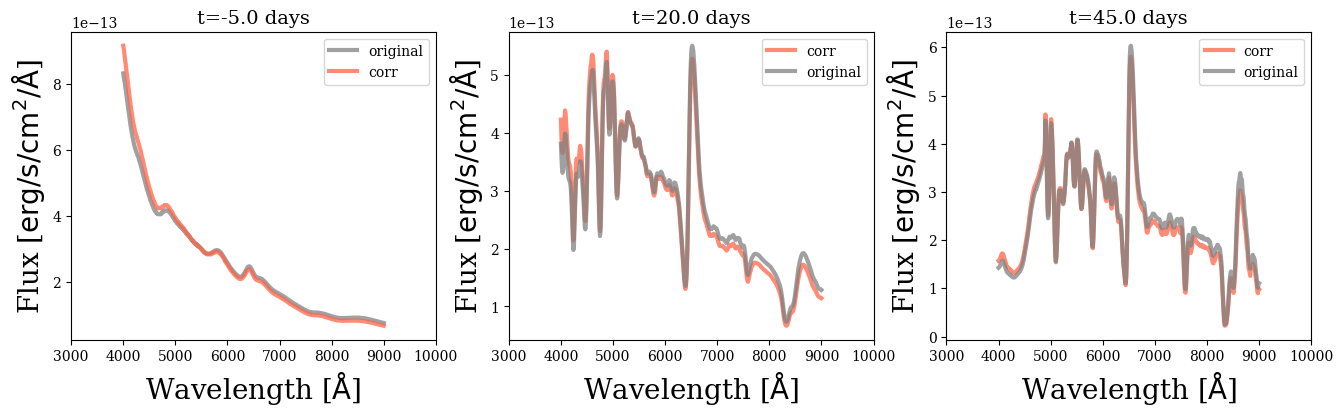

In [36]:
#	Wavelength
wavestep = 10
wave = np.arange(lmin, lmax+wavestep, wavestep)
wave = np.arange(4000, 9000+wavestep, wavestep)

#	Time
timestep = 1
times = np.arange(-5, 50+5, 5)
t = -5

colors = makeSpecColors(len(times), palette='viridis')

fig = plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
# for tt, t in enumerate(times[:1]):
tt = 0
t = times[tt]
plt.title(f"t={t:1.1f} days")
#	Model
flux = model.flux(t, wave)
cflux = cmodel.flux(t, wave)
#	Plot
plt.plot(wave, flux, c='grey', lw=3, alpha=0.75, label=f"original")
plt.plot(wave, cflux, c='tomato', lw=3, alpha=0.75, label=f"corr")

plt.xlim([xl, xr])
plt.legend()
plt.xlabel('Wavelength'+r' [$\rm \AA$]')
plt.ylabel(r'Flux [$\rm erg/s/cm^{2}/\AA$]')
################################################################
plt.subplot(1, 2, 2)
# for tt, t in enumerate(times[:1]):
tt = 5
t = times[tt]
plt.title(f"t={t:1.1f} days")
#	Model
flux = model.flux(t, wave)
cflux = cmodel.flux(t, wave)
#	Plot
plt.plot(wave, flux, c='grey', lw=3, alpha=0.75, label=f"original")
plt.plot(wave, cflux, c='tomato', lw=3, alpha=0.75, label=f"corr")

plt.xlim([xl, xr])
plt.legend()
plt.xlabel('Wavelength'+r' [$\rm \AA$]')
plt.ylabel(r'Flux [$\rm erg/s/cm^{2}/\AA$]')
################################################################
plt.subplot(1, 3, 2)
# for tt, t in enumerate(times[:1]):
tt = 5
t = times[tt]
plt.title(f"t={t:1.1f} days")
#	Model
flux = model.flux(t, wave)
cflux = cmodel.flux(t, wave)
#	Plot
plt.plot(wave, cflux, c='tomato', lw=3, alpha=0.75, label=f"corr")
plt.plot(wave, flux, c='grey', lw=3, alpha=0.75, label=f"original")

plt.xlim([xl, xr])
plt.legend()
plt.xlabel('Wavelength'+r' [$\rm \AA$]')
plt.ylabel(r'Flux [$\rm erg/s/cm^{2}/\AA$]')

################################################################
plt.subplot(1, 3, 3)
# for tt, t in enumerate(times[:1]):
tt = 10
t = times[tt]
plt.title(f"t={t:1.1f} days")
#	Model
flux = model.flux(t, wave)
cflux = cmodel.flux(t, wave)
#	Plot
plt.plot(wave, cflux, c='tomato', lw=3, alpha=0.75, label=f"corr")
plt.plot(wave, flux, c='grey', lw=3, alpha=0.75, label=f"original")

plt.xlim([xl, xr])
plt.legend()
plt.xlabel('Wavelength'+r' [$\rm \AA$]')
plt.ylabel(r'Flux [$\rm erg/s/cm^{2}/\AA$]')

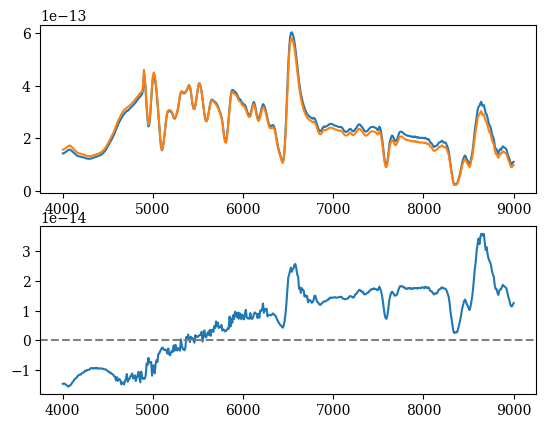

In [46]:
plt.subplot(2, 1, 1)
plt.plot(wave, flux)
plt.plot(wave, cflux)
plt.subplot(2, 1, 2)
plt.plot(wave, flux-cflux)
plt.axhline(y=0, ls='--', c='grey')